# Carga y preparación inicial del dataset Spotify
1. Carga del dataset original `SpotifyFeatures.csv`.
2. Inspección de estructura y tipos de datos.
3. Documentacion del conjunto de datos
4. Limpieza básica (tipos, duplicados, valores nulos).
5. Guardado del dataset limpio como `spotify_clean.csv` en `/data/processed/` para su uso posterior

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

# Mostrar todas las columnas
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)

## Carga de Datos

In [2]:
# Ruta al archivo fuente inicial 
DATA_PATH = "../data/raw/SpotifyFeatures.csv"

# Verificar existencia
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"No se encontró el archivo en {DATA_PATH}")

# Carga el archivo CSV
df = pd.read_csv(DATA_PATH)
print(f"Dataset se ha cargado correctamente en un arreglo: {df.shape}")


Dataset se ha cargado correctamente en un arreglo: (232725, 18)


## Verificacion de la Estructura General
### Inpección básica

In [3]:
# Información de columnas y tipos   
print("Información de columnas y tipos:\n")
df.info()
# Información estadística básica
print("\nInformación estadística básica:\n") 
df.head()

Información de columnas y tipos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Resumen estadístico

In [4]:
# Resumen estadístico
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
genre,232725,27,Comedy,9681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,232725,14564,Giuseppe Verdi,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,232724,148614,Home,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_id,232725,176774,0UE0RhnRaEYsiYgXpyLoZc,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,232725.0,NaN,NaN,NaN,41.127502,18.189948,0.0,29.0,43.0,55.0,100.0
acousticness,232725.0,NaN,NaN,NaN,0.36856,0.354768,0.0,0.0376,0.232,0.722,0.996
danceability,232725.0,NaN,NaN,NaN,0.554364,0.185608,0.0569,0.435,0.571,0.692,0.989
duration_ms,232725.0,NaN,NaN,NaN,235122.339306,118935.909299,15387.0,182857.0,220427.0,265768.0,5552917.0
energy,232725.0,NaN,NaN,NaN,0.570958,0.263456,0.00002,0.385,0.605,0.787,0.999
instrumentalness,232725.0,NaN,NaN,NaN,0.148301,0.302768,0.0,0.0,0.000044,0.0358,0.999


### Nulos y Duplicados

In [5]:
## Comprobación de duplicados y nulos
duplicados = df.duplicated().sum()
print(f"\n\nNúmero de filas duplicadas: {duplicados}\n")
print("Valores nulos por columna:\n")
print(df.isna().sum())

# Eliminar duplicados si existen
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo tamaño: {df.shape}")

print("\nRegistro(s) con valores nulos:")
filas_nulas = df[df.isna().any(axis=1)]
display(filas_nulas.T)




Número de filas duplicadas: 0

Valores nulos por columna:

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Registro(s) con valores nulos:


,208285
genre,World
artist_name,Elevation Worship
track_name,NaN
track_id,7BGQCe62A58Q5ZgpQFX93t
popularity,44
acousticness,0.019
danceability,0.287
duration_ms,350027
energy,0.446
instrumentalness,0.0


#### Elimina el valor nulo

In [6]:
df = df.dropna(subset=["track_name"])


## Normalizacion de tipo de Datos

In [7]:
# Convertir 'mode' a valor binario
df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})

# Convertir 'time_signature' a numérica (solo el número del compás)
df['time_signature'] = (
    df['time_signature']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)
df["time_signature"] = df["time_signature"].astype("int64")

df.dtypes


genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [8]:
# Muestra las columnas cambiadas
display(df[["mode", "time_signature"]].head(10))


,mode,time_signature
0,1,4
1,0,4
2,0,5
3,1,4
4,1,4
5,1,4
6,1,4
7,1,4
8,1,4
9,1,4


## Seleccion de columna objetivo
### Popularidad

In [9]:
## Popularidad
df["popularity"].describe().round(3)

count    232724.000
mean         41.127
std          18.190
min           0.000
25%          29.000
50%          43.000
75%          55.000
max         100.000
Name: popularity, dtype: float64

### Analisis Top 10

In [10]:
#TO-DO fix number total
df_check=df["popularity"].value_counts().sort_index(ascending=False).head(265000)
display(df_check)



popularity
100       2
99        4
98        3
97       10
96        8
       ... 
4       811
3       817
2       903
1      1289
0      6312
Name: count, Length: 101, dtype: int64

### Genero dentro del top 10

In [11]:
### Analisis Top 10
# Obtener top 10 valores de popularidad
df_top10 = df[df["popularity"].isin(
    df["popularity"].value_counts().sort_index(ascending=False).head(10).index
)]

# Porcentaje por género dentro del top 10
pct = (df_top10["genre"].value_counts(normalize=True) * 100).round(2)
cnt = df_top10["genre"].value_counts()

res = (
    pd.concat([cnt, pct], axis=1)
      .reset_index()
      .rename(columns={
          "index": "genre",
          "genre": "cantidad",
          "proportion": "porcentaje_top10"
      })
)

# Mostrar con símbolo %
res["porcentaje_top10"] = res["porcentaje_top10"].astype(str) + " %"

display(res)


,cantidad,count,porcentaje_top10
0,Pop,45,42.06 %
1,Rap,20,18.69 %
2,Dance,19,17.76 %
3,Hip-Hop,12,11.21 %
4,Reggaeton,6,5.61 %
5,R&B,2,1.87 %
6,Electronic,1,0.93 %
7,Indie,1,0.93 %
8,Rock,1,0.93 %


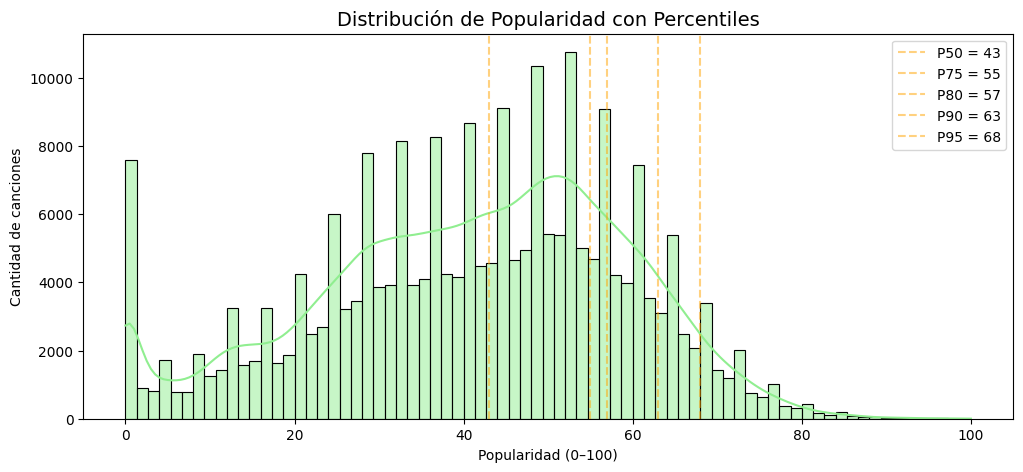

In [12]:
plt.figure(figsize=(12,5))
sns.histplot(df["popularity"], bins=75, kde=True, color="lightgreen")

# Líneas de percentiles
for p in [0.5, 0.75, 0.8, 0.9, 0.95]:
    plt.axvline(
        x=df["popularity"].quantile(p), color="orange", linestyle="--", 
        alpha=0.5, 
        label=f"P{int(p*100)} = {df['popularity'].quantile(p):.0f}")

plt.title("Distribución de Popularidad con Percentiles", fontsize=14)
plt.xlabel("Popularidad (0–100)")
plt.ylabel("Cantidad de canciones")
plt.legend()
plt.show()


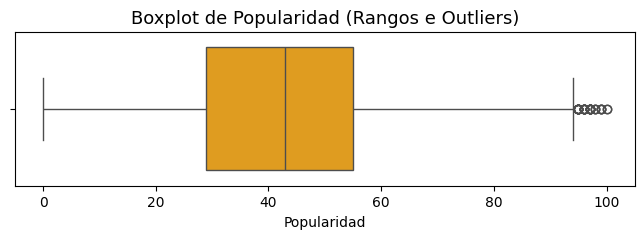

In [13]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df["popularity"], color="orange")
plt.title("Boxplot de Popularidad (Rangos e Outliers)", fontsize=13)
plt.xlabel("Popularidad")
plt.show()


<Axes: xlabel='popularity'>

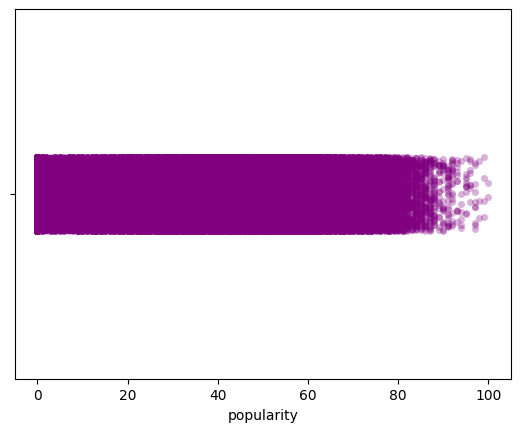

In [14]:
#Verificar la Dispersión de los datos
sns.stripplot(x=df["popularity"], color="purple", alpha=0.3)


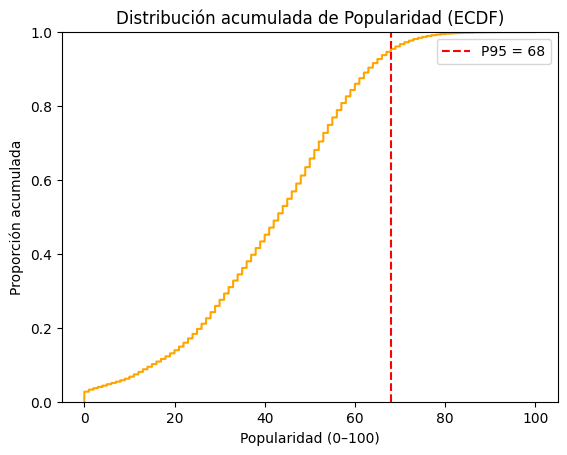

In [15]:
# Verificar cuantas canciones estan bajo el percentil 95%
sns.ecdfplot(df["popularity"], color="orange")
# Línea del percentil 95
p95 = df["popularity"].quantile(0.95)
plt.axvline(p95, color="red", linestyle="--", label=f"P95 = {p95:.0f}")

plt.title("Distribución acumulada de Popularidad (ECDF)")
plt.xlabel("Popularidad (0–100)")
plt.ylabel("Proporción acumulada")
plt.legend()
plt.show()


## Documentacion del conjunto de datos

In [16]:
# creamos una definicion mas descriptiva para darle sentido a cada columna y poder interpretar los datos 
# tambien para poder ajustar mejor el objetivo de analizar un hit musical

# Crear tabla descriptiva automática de columnas
desc_df = pd.DataFrame({
    "Columna": df.columns,
    "TipoReal": df.dtypes.astype(str),
    "Ejemplo": [df[col].dropna().iloc[0] for col in df.columns]
})

# Función para clasificar los tipos de forma interpretativa
def clasificar_tipo(col):
    if df[col].dtype == 'object':
        return "texto" if col in ["artist_name", "track_name", "track_id"] else "categórica"
    elif df[col].dtype in ['float64', 'int64']:
        # Buscar el rango de valores
        minimo, maximo = df[col].min(), df[col].max()
        if 0 <= minimo and maximo <= 1:
            return "numérica (0–1)"
        elif 0 <= minimo and maximo <= 100 and col == "popularity":
            return "numérica (0–100)"
        elif col == "loudness":
            return "numérica (dB)"
        elif col == "tempo":
            return "numérica (BPM)"
        else:
            return "numérica"
    else:
        return "otro"

# Aplicar la función a cada columna
desc_df["Tipo"] = desc_df["Columna"].apply(clasificar_tipo)

# Mapeo básico de descripción
descripciones = {
    "genre": "Género musical",
    "artist_name": "Nombre del artista",
    "track_name": "Título de la canción",
    "track_id": "ID único de Spotify",
    "popularity": "Nivel de popularidad en Spotify",
    "acousticness": "Qué tan acústica es la canción",
    "danceability": "Qué tan bailable es la canción",
    "duration_ms": "Duración en milisegundos",
    "energy": "Intensidad y actividad percibida",
    "instrumentalness": "Nivel instrumental (sin voz)",
    "key": "Tono musical (C#, F#, etc.)",
    "liveness": "Probabilidad de grabación en vivo",
    "loudness": "Volumen promedio (dB)",
    "mode": "Modo musical (Major/Minor)",
    "speechiness": "Presencia de palabras habladas",
    "tempo": "Velocidad del ritmo (BPM)",
    "time_signature": "Compás (4/4, 3/4, etc.)",
    "valence": "Qué tan positiva/feliz suena",
    "is_hit": "Variable objetivo binaria (1=Hit, 0=No Hit)"
}

# Agregar la descripción
desc_df["Descripción"] = desc_df["Columna"].map(descripciones)

# Reordenar columnas
desc_df = desc_df[["Columna", "Tipo", "Descripción", "Ejemplo"]]

# Mostrar tabla formateada
#rint(desc_df.to_string(index=False))    #<-------------------------

# Crear tabla Markdown y guardarla en notes/
tabla_md = desc_df.to_markdown(index=False, tablefmt="github")

# Asegurar que la carpeta notes exista
import os
os.makedirs("../notes", exist_ok=True)

# Ruta del archivo de salida
ruta_md = "../notes/Spotify_Dataset_Description.md"

# Guardar el archivo Markdown
with open(ruta_md, "w", encoding="utf-8") as f:
    f.write(tabla_md)

#print(f"Tabla guardada en: {ruta_md}")#<-------------------------



## Zona de Hit Musical

### Definición del valor de umbral : 95%

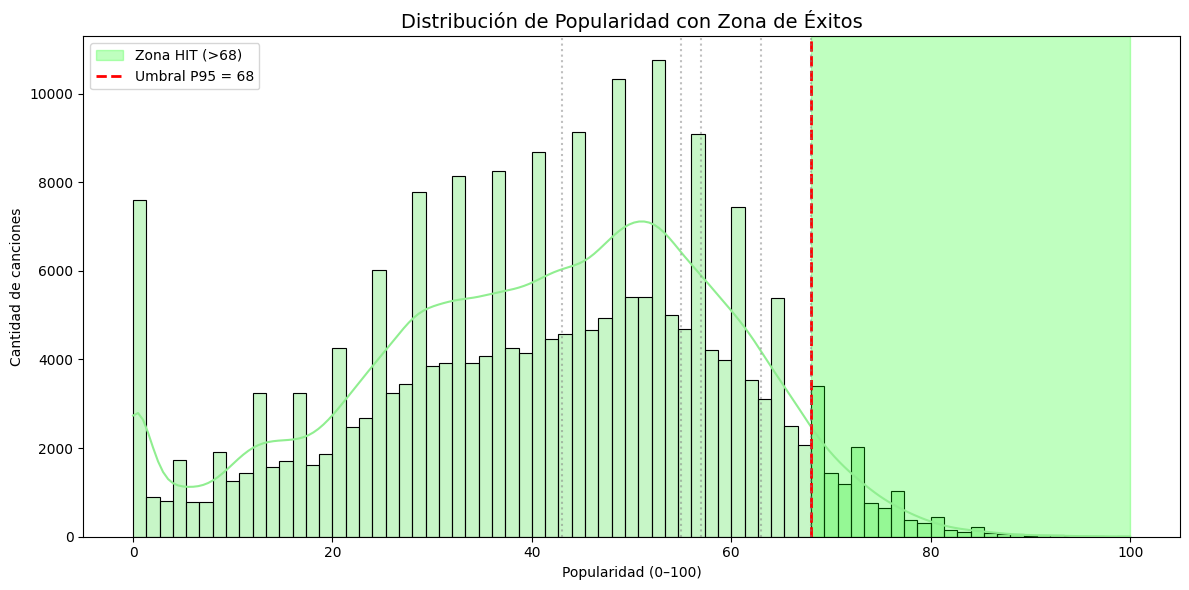

🎯 Umbral establecido en el percentil 95 → Popularidad > 68
✅ Canciones clasificadas como HIT: 10544 de 232724 (4.53%)


In [17]:
# --- Configuración del percentil de umbral ---
percentil_hit = 0.95   # 0.90 → 0.95 <-------------------------------
umbral = df["popularity"].quantile(percentil_hit)

# --- Crear el histograma ---
plt.figure(figsize=(12,6))
sns.histplot(df["popularity"], bins=75, kde=True, color="lightgreen", edgecolor="black")

# --- Rellenar la zona de los hits ---
plt.axvspan(umbral, df["popularity"].max(), color="lime", alpha=0.25, label=f"Zona HIT (>{umbral:.0f})")

# --- Dibujar línea de umbral ---
plt.axvline(umbral, color="red", linestyle="--", linewidth=2, label=f"Umbral P{int(percentil_hit*100)} = {umbral:.0f}")

# --- Opcional: añadir otras líneas de percentiles ---
for p in [0.5, 0.75, 0.8, 0.9, 0.95]:
    plt.axvline(df["popularity"].quantile(p), color="gray", linestyle=":", alpha=0.5)

# --- Estética ---
plt.title("Distribución de Popularidad con Zona de Éxitos", fontsize=14)
plt.xlabel("Popularidad (0–100)")
plt.ylabel("Cantidad de canciones")
plt.legend()
plt.tight_layout()
plt.show()

# --- Crear la variable objetivo basada en ese umbral ---
df["is_hit"] = (df["popularity"] > umbral).astype(int)

print(f"🎯 Umbral establecido en el percentil {int(percentil_hit*100)} → Popularidad > {umbral:.0f}")
print(f"✅ Canciones clasificadas como HIT: {df['is_hit'].sum()} de {len(df)} ({df['is_hit'].mean()*100:.2f}%)")


## Creación del dataset limpio.
### Creacion de la columna objetivo

In [18]:
df["is_hit"] = (df["popularity"] > umbral).astype(int)
print(f"🎯 Umbral automático: {umbral:.0f} → {df['is_hit'].sum()} canciones clasificadas como hit")


🎯 Umbral automático: 68 → 10544 canciones clasificadas como hit


### Comprobacion del dataset

In [19]:
# Canciones con mayor popularidad
df_top5 = df.sort_values("popularity", ascending=False).head(5)
display(df_top5.T)



,9027,107804,107802,9026,86951
genre,Dance,Pop,Pop,Dance,Rap
artist_name,Ariana Grande,Ariana Grande,Ariana Grande,Ariana Grande,Post Malone
track_name,7 rings,7 rings,"break up with your girlfriend, i'm bored","break up with your girlfriend, i'm bored",Wow.
track_id,14msK75pk3pA33pzPVNtBF,14msK75pk3pA33pzPVNtBF,4kV4N9D1iKVxx1KLvtTpjS,4kV4N9D1iKVxx1KLvtTpjS,6MWtB6iiXyIwun0YzU6DFP
popularity,100,100,99,99,99
acousticness,0.578,0.578,0.0421,0.0421,0.163
danceability,0.725,0.725,0.726,0.726,0.833
duration_ms,178640,178640,190440,190440,149520
energy,0.321,0.321,0.554,0.554,0.539
instrumentalness,0.0,0.0,0.0,0.0,0.000002


In [20]:
df["is_hit"].value_counts(normalize=True).round(3) * 100


is_hit
0    95.5
1     4.5
Name: proportion, dtype: float64

## Creacion Del Dataset Limpio

In [21]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/spotify_clean.csv", index=False)
print("💾 Archivo guardado en: ../data/processed/spotify_clean.csv")

💾 Archivo guardado en: ../data/processed/spotify_clean.csv


## Carga y comprobacion del nuevo Dataset

In [22]:
# Ruta al archivo fuente inicial 
DATA_PATH = "../data/processed/spotify_clean.csv"

# Verificar existencia
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"No se encontró el archivo en {DATA_PATH}")

# Carga el archivo CSV
df_clean = pd.read_csv(DATA_PATH)
print(f"Dataset se ha cargado correctamente en un arreglo: {df.shape}")
# Verificamos tipos de datos
display(df_clean.dtypes)

# Información estadística básica
print("\nInformación estadística básica:\n") 
df_clean.head()

Dataset se ha cargado correctamente en un arreglo: (232724, 19)


genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
is_hit                int64
dtype: object


Información estadística básica:



,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,is_hit
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,1,0.0525,166.969,4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0,0.0868,174.003,4,0.816,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0,0.0362,99.488,5,0.368,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,1,0.0395,171.758,4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,1,0.0456,140.576,4,0.390,0
